In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time
import itertools as it
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn import metrics
import warnings
np.warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('kaggle_train.csv')
test = pd.read_csv('kaggle_test.csv')

In [3]:
y_train = train.y
X_train = train.drop("y", axis = 1)

X_test = test

X_train_columns = X_train.columns
X_test_columns = X_test.columns

In [4]:
scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train_columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_train_columns)

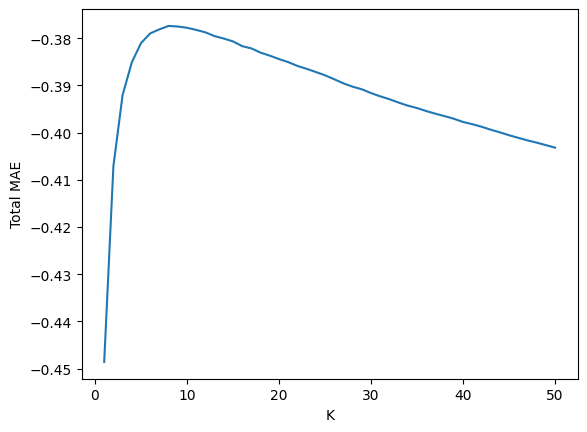

In [5]:
total_mae = []
k_values = [i for i in range(1, 51)]

# Number of missing values
missing_values = X_train.isna().sum().sum()

for k in k_values:
  weighted_avg_mae = []

  # Impute the missing values
  X_imputed_k = pd.DataFrame(KNNImputer(n_neighbors = k).fit_transform(X_train), columns = X_train.columns)

  for p in X_train.columns:
    # p is a series

    if X_train[p].isna().sum() != 0:
      # If the predictor has missing values then remove the predictor from the full imputed table
      X_imputed_non_missing_k = X_imputed_k.loc[~X_train[p].isnull(),:]
      X_imputed_non_missing_k.reset_index(drop = True, inplace = True)
      # Remove the observations with missing values in the p column
      predictor_nonmissing = X_imputed_k.loc[~X_train[p].isnull(), p]

      # Cross_val_score
      knn_model = KNeighborsRegressor(n_neighbors = k, n_jobs = -1)
      cv_scores = cross_val_score(knn_model, X_imputed_non_missing_k, predictor_nonmissing, 
                                  cv = 5, scoring = 'neg_mean_absolute_error')
      weighted_avg_mae.append(cv_scores.mean() * X_train[p].isna().sum())

    else:
      pass 

  total_mae.append((sum(weighted_avg_mae)/(X_train.isna().sum().sum())))
  # Sum(weighted_avg_mae) = total error
optimal_k = k_values[total_mae.index(min(total_mae))]

plt.plot(k_values, total_mae)
plt.xlabel('K')
plt.ylabel('Total MAE')
plt.show()

In [8]:
k_values[total_mae.index(max(total_mae))]

8